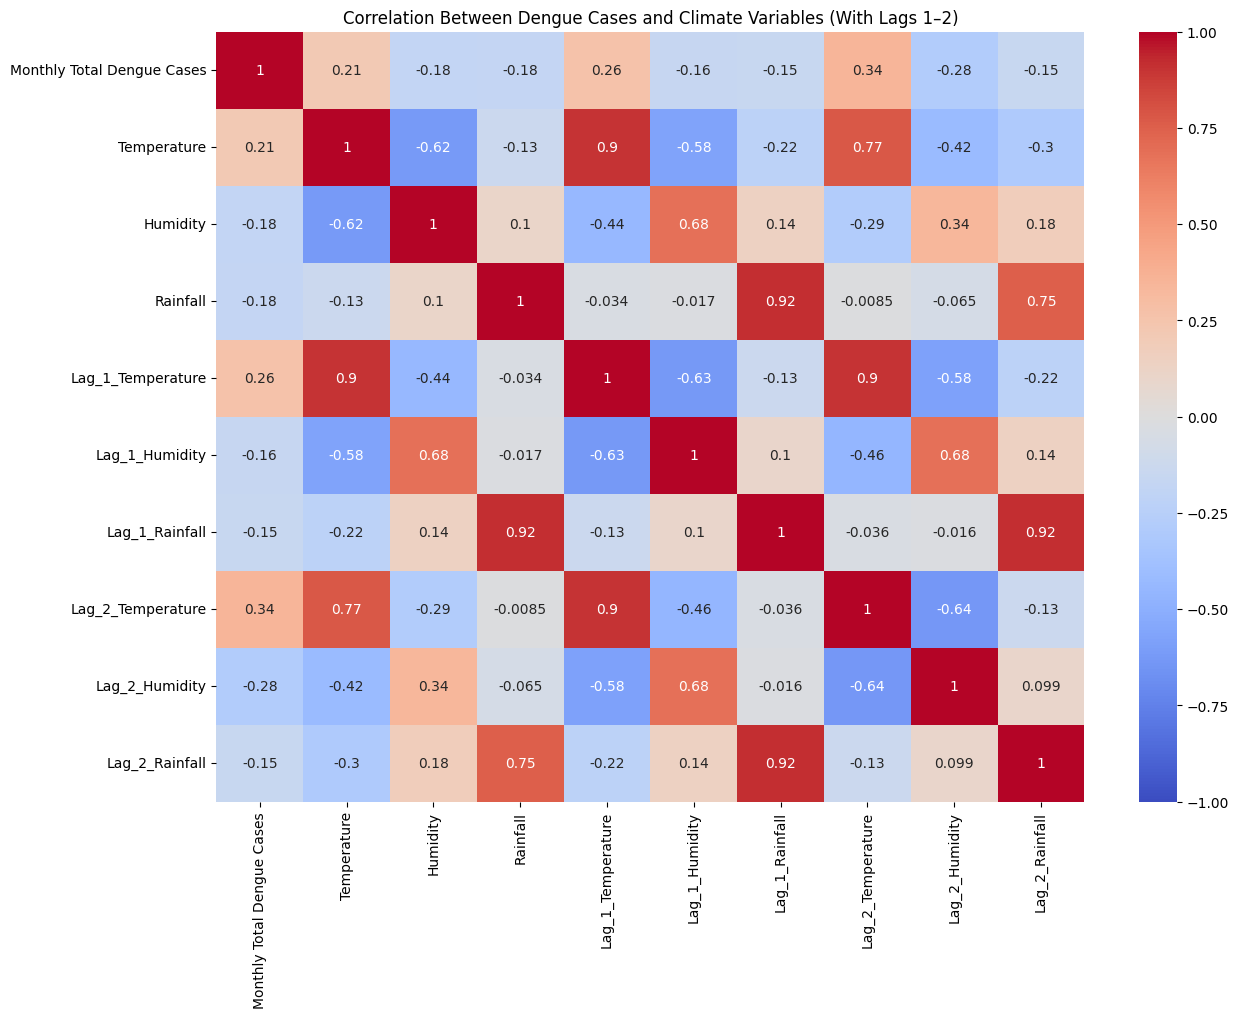

Correlation between 'Monthly Total Dengue Cases' and climate features (including lags):
Lag_2_Temperature    0.344618
Lag_1_Temperature    0.259182
Temperature          0.211347
Lag_2_Rainfall      -0.151058
Lag_1_Rainfall      -0.153892
Lag_1_Humidity      -0.163058
Rainfall            -0.178196
Humidity            -0.182875
Lag_2_Humidity      -0.282687
Name: Monthly Total Dengue Cases, dtype: float64


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Load the CSV file
file_path = os.path.join("..", "Final Data", "Total_Cases_Per_Month_With_Climate.csv")
df = pd.read_csv(file_path)

# Create lag features for climate variables (Lag 1 to Lag 3)
for lag in range(1, 3):
    df[f'Lag_{lag}_Temperature'] = df['Temperature'].shift(lag)
    df[f'Lag_{lag}_Humidity'] = df['Humidity'].shift(lag)
    df[f'Lag_{lag}_Rainfall'] = df['Rainfall'].shift(lag)

# Drop rows with NaN values from lag features
lag_columns = [f'Lag_{lag}_{var}' for lag in range(1, 3) for var in ['Temperature', 'Humidity', 'Rainfall']]
df = df.dropna(subset=lag_columns)

# Select dengue cases and climate variables (with lags) for correlation
correlation_df = df[['Monthly Total Dengue Cases', 'Temperature', 'Humidity', 'Rainfall'] + lag_columns]

# Calculate correlation matrix
correlation_matrix = correlation_df.corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Between Dengue Cases and Climate Variables (With Lags 1–2)")
plt.show()

# Print correlation of climate features with dengue cases
print("Correlation between 'Monthly Total Dengue Cases' and climate features (including lags):")
print(correlation_matrix['Monthly Total Dengue Cases'].drop('Monthly Total Dengue Cases').sort_values(ascending=False))

